In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
# import seaborn as sns
# sns.set_style("darkgrid")
# sns.set_context("talk")

<IPython.core.display.Javascript object>


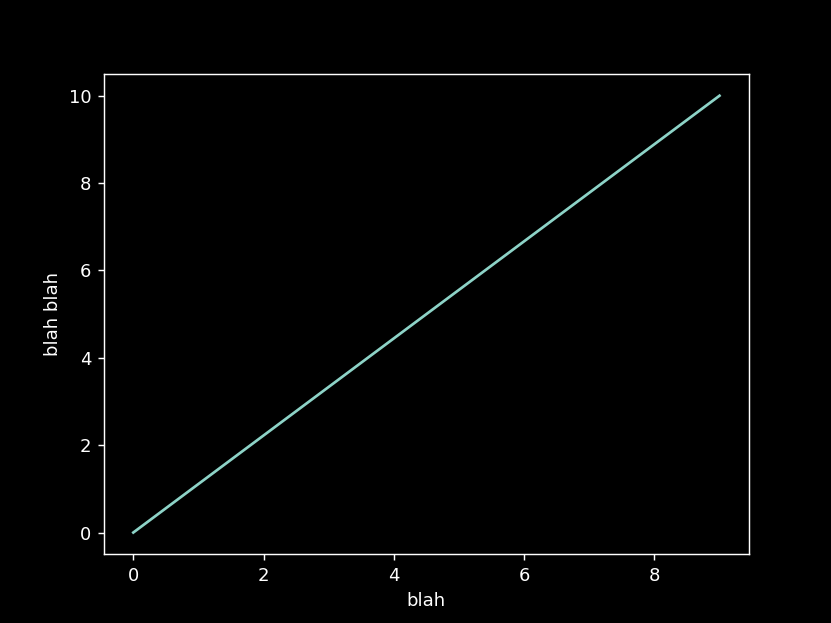

In [9]:
plt.figure()
plt.plot(np.linspace(0,10,num=10))
plt.xlabel('blah')
plt.ylabel('blah blah')
plt.savefig('blah.png', bbox_inches='tight', edgecolor='none')

# Foregrounds

The foregrounds are synchrotron power spectra which are smooth in frequency.

<IPython.core.display.Javascript object>


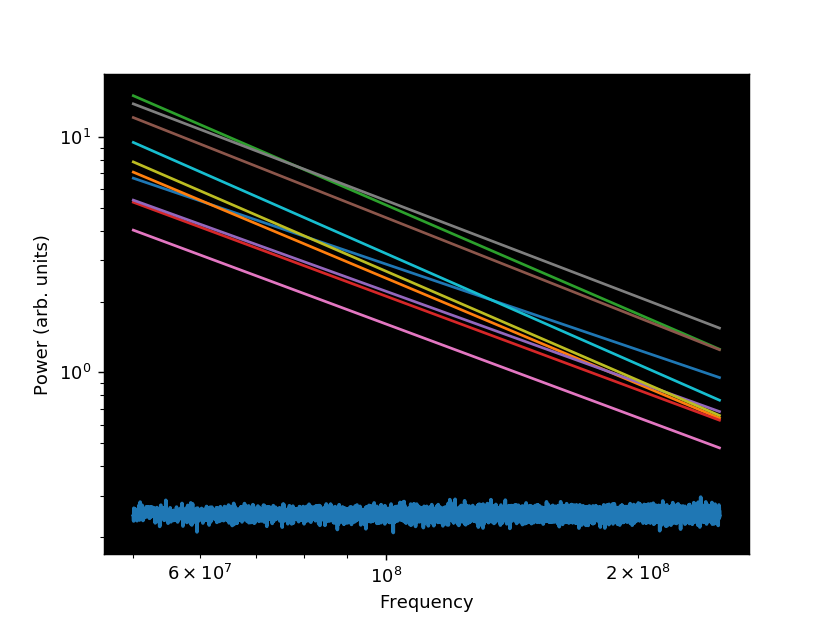

In [5]:
fqs = np.linspace(50, 250, num=8192)*1e6
spectral_indices = np.random.uniform(low=2.2, high=2.6, size=10)
EoR = np.random.normal(loc=0.5, scale=1e-2, size=len(fqs))**2

fig, ax = plt.subplots(1,1)

fgnds = []
for a in spectral_indices:
    e = fqs**(1-a)/2
    fgnds.append(np.random.random()*15*e/np.max(e))

ax.loglog(fqs, np.transpose(fgnds))
ax.loglog(fqs, EoR, linewidth=2)
ax.set_xlabel('Frequency')
ax.set_ylabel('Power (arb. units)')
ax.set_facecolor('black')

fig.savefig('foreground_spectra.png', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')